In [2]:
import numpy as np
import pandas as pd

# Series

In [3]:
studs = pd.Series(['Bob', 'Mary', 'Joe', 'Will', 'Bob', 'Anne'], 
                         index = ['f', 'e', 'c', 'd', 'a', 'b'])

In [4]:
# Integer-location based indexing
studs.iloc[1:3] # or studs[1:3]

e    Mary
c     Joe
dtype: object

In [5]:
# Boolean indexing
studs.loc[studs == 'Bob'] # or studs[studs == 'Bob']

f    Bob
a    Bob
dtype: object

In [6]:
# Label indexing
studs.loc[['e', 'c', 'd']] # or studs[['e', 'c', d']]

e    Mary
c     Joe
d    Will
dtype: object

In [7]:
studs.loc['e':'d'] # or studs['e':'d']

e    Mary
c     Joe
d    Will
dtype: object

# DataFrame

## DataFrame construction

In [8]:
# Specify values for each column
df = pd.DataFrame({
        "CS101": [10, 5, 8],
        "CS102": [8, 7, 8],
        "CS103": [9, 10, 9],
        "CS104": [5, 7, 6]
    },
    index = ['Bob', 'Mary', 'Anne'])
df 

,CS101,CS102,CS103,CS104
Bob,10,8,9,5
Mary,5,7,10,7
Anne,8,8,9,6


In [9]:
# Specify values for each row
data = [[10, 8, 9, 5], [5, 7, 10, 7], [8, 8, 9, 6]]
df = pd.DataFrame(data, 
                  index = ['Bob', 'Mary', 'Anne'], 
                  columns = ['CS101', 'CS102', 'CS103', 'CS104'])
df.index.name = 'Student'
df.columns.name = 'Course'
df

Course,CS101,CS102,CS103,CS104
Student,,,,
Bob,10,8,9,5
Mary,5,7,10,7
Anne,8,8,9,6


In [10]:
# Specify values for each row with Hierarchical Indexing
data = [[10, 8, 9, 5], [5, 7, 10, 7], [8, 8, 9, 6]]
# Column MultiIndex
columnIdx = pd.MultiIndex.from_tuples([('CS', 'CS101'), ('CS', 'CS102'), ('ST', 'CS103'), ('ST', 'CS104')])
columnIdx.names = ['Dept', 'Course']
# Row MultiIndex
rowIdx = pd.MultiIndex.from_tuples([('Postgrad', 'Bob'), ('Postgrad', 'Mary'), ('Undergrad', 'Anne')])
rowIdx.names = ['Level', 'Student']
# Create dataframe
df = pd.DataFrame(data, index = rowIdx, columns = columnIdx)
df

Dept                 CS          ST      
Course            CS101 CS102 CS103 CS104
Level     Student                        
Postgrad  Bob        10     8     9     5
          Mary        5     7    10     7
Undergrad Anne        8     8     9     6

## Hierarchical Indexing

In [11]:
def hierarchicalIndexingSample():
    # Specify values for each row with Hierarchical Indexing
    data = [[10, 8, 9, 5], [5, 7, 10, 7], [7, 6, 10, 6], [8, 8, 9, 6]]
    # Column MultiIndex
    columnIdx = pd.MultiIndex.from_tuples(
      [('CS', 'CS101'), ('CS', 'CS102'), ('DSSS', 'CS103'), 
       ('DSSS', 'CS104')], names = ['Department', 'Course'])
    # Row MultiIndex
    rowIdx = pd.MultiIndex.from_tuples(
        [('Postgrad', 'Bob'), ('Undergrad', 'Will'), ('Postgrad', 'Mary'), 
         ('Undergrad', 'Anne')], names = ['Level', 'Student'])
    # Create dataframe
    df = pd.DataFrame(data, index = rowIdx, columns = columnIdx)
    df = df.sort_index()
    return df
df = hierarchicalIndexingSample()
df

Department           CS        DSSS      
Course            CS101 CS102 CS103 CS104
Level     Student                        
Postgrad  Bob        10     8     9     5
          Mary        7     6    10     6
Undergrad Anne        8     8     9     6
          Will        5     7    10     7

## DataFrame indexing

In [12]:
df = pd.DataFrame(np.random.randint(5, 10, (4, 5)), 
    index = pd.Index(['Bob', 'Mary', 'Joe', 'Will'], 
                     name='students'), 
    columns = pd.Index(['CS101', 'CS102', 'CS103', 'CS104', 'CS105'], 
                       name='courses'))
df

courses,CS101,CS102,CS103,CS104,CS105
students,,,,,
Bob,9,6,6,7,7
Mary,9,5,5,8,5
Joe,9,6,9,6,6
Will,8,9,9,7,5


In [13]:
# Shorthand syntax for column selection
df[['CS102', 'CS105']]
# or df.loc[:, ['CS102', 'CS105']]

courses,CS102,CS105
students,,
Bob,6,7
Mary,5,5
Joe,6,6
Will,9,5


In [14]:
# Shorthand syntax for row selection
df[0:2]
# or df.iloc[0:2] or df.iloc[0:2, :]

courses,CS101,CS102,CS103,CS104,CS105
students,,,,,
Bob,9,6,6,7,7
Mary,9,5,5,8,5


In [15]:
# Label-based indexing across two axes
df.loc[['Bob', 'Mary'], ['CS102', 'CS103']]

courses,CS102,CS103
students,,
Bob,6,6
Mary,5,5


In [16]:
# Integer-based indexing across two axes
df.iloc[0:1, :-1]

courses,CS101,CS102,CS103,CS104
students,,,,
Bob,9,6,6,7


In [17]:
# Label-based indexing across two axes
df.loc[['Bob', 'Mary'], ['CS102', 'CS105']]

courses,CS102,CS105
students,,
Bob,6,7
Mary,5,5


In [18]:
# Label-based indexing combined with boolean arrays
# columns CS101, CS102  for students with grade > 6 in CS101
df.loc[df.CS101 > 6, ['CS101', 'CS102']]

courses,CS101,CS102
students,,
Bob,9,6
Mary,9,5
Joe,9,6
Will,8,9


In [19]:
# Boolean Indexing, 
# students with average of columns CS104, CS105
# larger than 6
df[(df['CS105'] + df['CS104'])/2 > 6]

courses,CS101,CS102,CS103,CS104,CS105
students,,,,,
Bob,9,6,6,7,7
Mary,9,5,5,8,5


## DataFrame resizing

In [20]:
# Drop rows
newdf = df.drop(['Bob', 'Mary'], axis=0)
newdf
# or df.drop(index=['Bob', 'Mary'])

courses,CS101,CS102,CS103,CS104,CS105
students,,,,,
Joe,9,6,9,6,6
Will,8,9,9,7,5


In [21]:
# Drop columns
newdf = df.drop('CS105', axis=1)
newdf
# or df.drop(columns=['CS105'])

courses,CS101,CS102,CS103,CS104
students,,,,
Bob,9,6,6,7
Mary,9,5,5,8
Joe,9,6,9,6
Will,8,9,9,7


In [22]:
# Create new column
df['Thesis'] = [9, 8, 9, 7]
df

courses,CS101,CS102,CS103,CS104,CS105,Thesis
students,,,,,,
Bob,9,6,6,7,7,9
Mary,9,5,5,8,5,8
Joe,9,6,9,6,6,9
Will,8,9,9,7,5,7


In [23]:
df1 = df.assign(CourseAvg = lambda row : row[0:5].mean(axis=1))
df2  = df1.assign(DiplomaGrade = df1.Thesis * 0.2 
                  + df1.CourseAvg * 0.8)
df2[['CourseAvg', 'DiplomaGrade']]

courses,CourseAvg,DiplomaGrade
students,,
Bob,7.333333,7.666667
Mary,6.666667,6.933333
Joe,7.500000,7.800000
Will,7.500000,7.400000


In [24]:
# Add columns CourseAvg and DiplomaGrade
df1 = df.assign(CourseAvg = lambda row : row.iloc[0:4].mean(axis=1))
df1 = df1.assign(DiplomaGrade = df1['Thesis'] * 0.2 + df1['CourseAvg'] * 0.8)
# Rename columns
df = df.rename(columns={'CourseAvg' : 'Course Avg', 
                   'DiplomaGrade': 'Diploma Grade'})

# Rename columns axis
df.columns.name = 'student report'
# Reset and move index to columns
df = df.reset_index()
df

student report,students,CS101,CS102,CS103,CS104,CS105,Thesis
0,Bob,9,6,6,7,7,9
1,Mary,9,5,5,8,5,8
2,Joe,9,6,9,6,6,9
3,Will,8,9,9,7,5,7


In [25]:
# Select a slice based on a row subgroup
df = hierarchicalIndexingSample()
df.loc['Postgrad']


Department    CS        DSSS      
Course     CS101 CS102 CS103 CS104
Student                           
Bob           10     8     9     5
Mary           7     6    10     6

In [26]:
# Select a slice based on a column subgroup
df.loc[:, 'CS']

Course             CS101  CS102
Level     Student              
Postgrad  Bob         10      8
          Mary         7      6
Undergrad Anne         8      8
          Will         5      7

In [27]:
# Select a row or column slice with an index tuple 
df.loc[:, ('CS', 'CS101')]

Level      Student
Postgrad   Bob        10
           Mary        7
Undergrad  Anne        8
           Will        5
Name: (CS, CS101), dtype: int64

In [28]:
# Select a slice based on an inner level label
idx = pd.IndexSlice
df.loc[idx[:, 'Bob'], 'CS']

,Course,CS101,CS102
Level,Student,,
Postgrad,Bob,10,8


## DataFrame Reshaping 

### DataFrame Stack 

In [29]:
data = [[10, 8, 9, 5], [5, 7, 10, 7], [7, 6, 10, 6], [8, 8, 9, 6]]

rowIdx = pd.MultiIndex.from_tuples(
    [('Postgrad', 'Bob'), ('Undergrad', 'Will'), ('Postgrad', 'Mary'), 
     ('Undergrad', 'Anne')], names = ['Level', 'Student'])

colIdx = pd.MultiIndex.from_tuples(
    [('CS101', 'Oral'), ('CS101', 'Written'), ('CS102', 'Oral'), 
     ('CS102', 'Written')], names = ['Course', 'Exam grade'])

df = pd.DataFrame(data, index = rowIdx, columns=colIdx)
df.sort_index()
df

Course            CS101         CS102        
Exam grade         Oral Written  Oral Written
Level     Student                            
Postgrad  Bob        10       8     9       5
Undergrad Will        5       7    10       7
Postgrad  Mary        7       6    10       6
Undergrad Anne        8       8     9       6

In [30]:
# Move inner-most column level to the row
# hierarchical index
df.stack(future_stack=True)

Course                        CS101  CS102
Level     Student Exam grade              
Postgrad  Bob     Oral           10      9
                  Written         8      5
Undergrad Will    Oral            5     10
                  Written         7      7
Postgrad  Mary    Oral            7     10
                  Written         6      6
Undergrad Anne    Oral            8      9
                  Written         8      6

### DataFrame unstack

In [31]:
df = pd.DataFrame(np.random.randint(5, 10, (4, 4)), 
    index = pd.Index(['Bob', 'Mary', 'Joe', 'Will'], 
                     name='students'), 
    columns = pd.Index(['CS101', 'CS102', 'CS103', 'CS104'], 
                       name='courses'))
df

courses,CS101,CS102,CS103,CS104
students,,,,
Bob,9,6,7,5
Mary,6,9,8,6
Joe,7,8,5,6
Will,5,5,8,6


In [32]:
series = df.unstack()
series

courses  students
CS101    Bob         9
         Mary        6
         Joe         7
         Will        5
CS102    Bob         6
         Mary        9
         Joe         8
         Will        5
CS103    Bob         7
         Mary        8
         Joe         5
         Will        8
CS104    Bob         5
         Mary        6
         Joe         6
         Will        6
dtype: int64

### DataFrame melt

In [33]:
df = pd.DataFrame(np.random.randint(5, 10, (4, 4)), 
    index = pd.Index(['Bob', 'Mary', 'Joe', 'Will'], 
                     name='Student'), 
    columns = pd.Index(['CS101', 'CS102', 'CS103', 'CS104'], 
                       name='Course'))
df = df.reset_index()
df

Course,Student,CS101,CS102,CS103,CS104
0,Bob,7,9,5,7
1,Mary,7,9,5,8
2,Joe,8,5,9,6
3,Will,6,6,6,7


In [34]:
# Collapse CS* columns to a single column (Course)
# and their respective values to new column Grade
# students column is maintained as identifier variable
tidydf = df.melt(id_vars=['Student'], value_name='Grade')
tidydf.head()

,Student,Course,Grade
0,Bob,CS101,7
1,Mary,CS101,7
2,Joe,CS101,8
3,Will,CS101,6
4,Bob,CS102,9


### DataFrame pivot

In [35]:
# Spread a values column across a new column index
tidydf.pivot(index='Student', columns = 'Course', values ='Grade')

Course,CS101,CS102,CS103,CS104
Student,,,,
Bob,7,9,5,7
Joe,8,5,9,6
Mary,7,9,5,8
Will,6,6,6,7


In [36]:
# Support for multi-level index
df = hierarchicalIndexingSample()
#df = df.pivot_table(index=['Level', 'Student'], 
#              columns = 'Course', values ='Grade')
#df

# Data aggregation

In [37]:
# Specify values for each row with Hierarchical Indexing
data = [[10, 8, 9, 5], [5, 7, 10, 7], [7, 6, 10, 6], [8, 8, 9, 6]]
# Column MultiIndex
columnIdx = pd.MultiIndex.from_tuples(
  [('CS', 'CS101'), ('CS', 'CS102'), ('DSSS', 'CS103'), ('DSSS','CS104')], names = ['Department', 'Course'])
# Row MultiIndex
rowIdx = pd.MultiIndex.from_tuples(
    [('Postgrad', 'Bob'), ('Undergrad', 'Will'), ('Postgrad', 'Mary'), 
     ('Undergrad', 'Anne')], names = ['Level', 'Student'])
# Create dataframe
df = pd.DataFrame(data, index = rowIdx, columns = columnIdx)
df = df.sort_index()
df

Department           CS        DSSS      
Course            CS101 CS102 CS103 CS104
Level     Student                        
Postgrad  Bob        10     8     9     5
          Mary        7     6    10     6
Undergrad Anne        8     8     9     6
          Will        5     7    10     7

In [38]:
# Descriptive statistics for each column
df.describe()

Department         CS                DSSS          
Course          CS101     CS102     CS103     CS104
count        4.000000  4.000000   4.00000  4.000000
mean         7.500000  7.250000   9.50000  6.000000
std          2.081666  0.957427   0.57735  0.816497
min          5.000000  6.000000   9.00000  5.000000
25%          6.500000  6.750000   9.00000  5.750000
50%          7.500000  7.500000   9.50000  6.000000
75%          8.500000  8.000000  10.00000  6.250000
max         10.000000  8.000000  10.00000  7.000000

In [39]:
# Calculate statistics for a specific column
df.loc[:, ('CS', 'CS101')].describe()

count     4.000000
mean      7.500000
std       2.081666
min       5.000000
25%       6.500000
50%       7.500000
75%       8.500000
max      10.000000
Name: (CS, CS101), dtype: float64

In [40]:
# Individual aggregate function for all columns
df.mean()

Department  Course
CS          CS101     7.50
            CS102     7.25
DSSS        CS103     9.50
            CS104     6.00
dtype: float64

In [41]:
# Multiple aggregation functions for all columns
df.agg(['mean', 'max', 'min'])

Department    CS        DSSS      
Course     CS101 CS102 CS103 CS104
mean         7.5  7.25   9.5   6.0
max         10.0  8.00  10.0   7.0
min          5.0  6.00   9.0   5.0

In [42]:
# Multiple aggregation functions for all rows
df.agg(['mean', 'max', 'min'], axis=1)

mean   max  min
Level     Student                 
Postgrad  Bob      8.00  10.0  5.0
          Mary     7.25  10.0  6.0
Undergrad Anne     7.75   9.0  6.0
          Will     7.25  10.0  5.0

## Group operations

In [43]:
df = hierarchicalIndexingSample()

In [44]:
# Group per level of studies
# Iterate over groups
groups = df.groupby(by='Level')
for name, group in groups:
    print(name)
    print(group)

Postgrad
Department          CS        DSSS      
Course           CS101 CS102 CS103 CS104
Level    Student                        
Postgrad Bob        10     8     9     5
         Mary        7     6    10     6
Undergrad
Department           CS        DSSS      
Course            CS101 CS102 CS103 CS104
Level     Student                        
Undergrad Anne        8     8     9     6
          Will        5     7    10     7


In [45]:
# Compute mean and max for each course per level
groups.agg(['mean', 'max'])

Department    CS                DSSS              
Course     CS101     CS102     CS103     CS104    
            mean max  mean max  mean max  mean max
Level                                             
Postgrad     8.5  10   7.0   8   9.5  10   5.5   6
Undergrad    6.5   8   7.5   8   9.5  10   6.5   7

# Data loading & cleaning

# Plotting with matplotlib

In [57]:
df = hierarchicalIndexingSample()


Department    CS        DSSS      
Course     CS101 CS102 CS103 CS104
Level                             
Postgrad     8.5   7.0   9.5   5.5
Undergrad    6.5   7.5   9.5   6.5

<Axes: title={'center': 'Maximum Grade per Student level'}, xlabel='Level'>

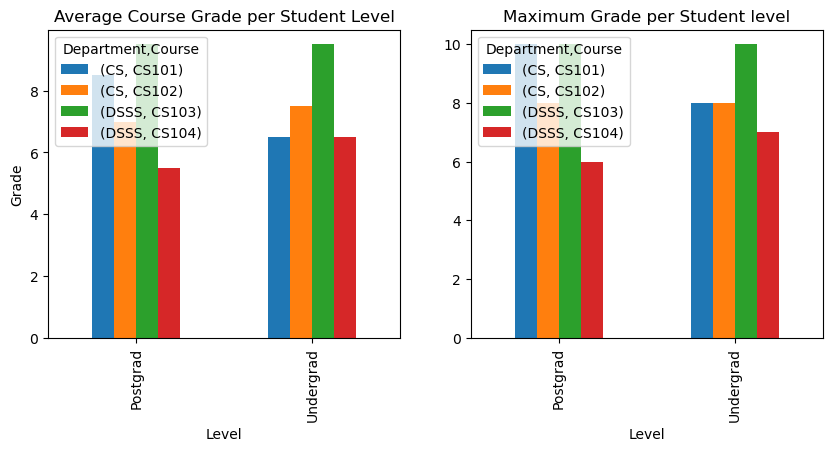

In [87]:
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()
# Add a subplot to the figure
ax1 = fig.add_subplot(1, 2, 1)

# Configure plot
ax1.set_title('Average Course Grade per Student Level')
ax1.set_ylabel('Grade')

# create the DataFrame
avgGradePerLevel = df.groupby(by='Level').mean()
# Visualize the dataframe as a bar plot 
avgGradePerLevel.plot.bar(ax=ax1, figsize=(10, 4))

# Add a second subplot to the figure
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Maximum Grade per Student level')
# Visualize another DataFrame 
# Max grade per course
maxGradePerLevel = df.groupby(by='Level').max()
maxGradePerLevel.plot.bar(ax=ax2)

<Axes: xlabel='Level'>